In [2]:
from sympy import *
init_printing()

#### Assignment 1

In [4]:
# a)
k = symbols('k')
A = Matrix([[2,3],[-1,1]])
B = Matrix([[1,9],[-3,k]])

solve(A*B - B*A, k)

In [ ]:
# b
B = Matrix([[1,-5,3],[3,-8,-5],[-1,2,k]])
solve(B.echelon_form()[-1, -1], k)

In [11]:
# c
C = Matrix([[k**(2),2*k],[8,k]])
solve(C.echelon_form()[-1, -1], k)

#### Assignment 2

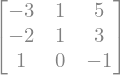

In [20]:
# a
A = Matrix([[1,-1,2],[-1,2,1],[1,-1,1]])

Ainv = Matrix.hstack(A, eye(A.shape[0])).rref()[0][:, A.shape[0]:]
Ainv

In [21]:
# b
b = Matrix([5, 6, 2])
Ainv*b

#### Assignment 3

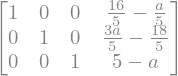

In [26]:
a = symbols('a')
A = Matrix([[1, 2, 1, 1], [-2, 1, 1, -5], [2, -1, -2, a]])
A.rref()[0]

#### Assignment 4

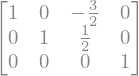

In [ ]:
# a
A = Matrix([[4,8,-2],[-6,2,10],[-2,6,6]])
b = Matrix([2, 18, 15])
Matrix.hstack(A, b).rref()[0] # inconsistent

In [ ]:
# b
# Dependent: v3 = -3/2 v1 + 1/2 v2 so 3v1-v2+2v3 = 0

#### Assignment 5

In [33]:
A=Matrix([[1,1,0],[0,1,1],[0,0,1]])
B=Matrix([[2,0,0],[1,1,2],[2,0,1]])
C=Matrix([[1,1,0],[0,1,0],[0,1,2]])

# XA = XB + C =>X(A-B) = C => X = C(A-B)^-1
X = C*(A-B).inv()
X.det()

#### Assignment 6

In [35]:
# a
p, q, = symbols('p q')
A = Matrix([[1, 3], [-2, -8]])
solve(A**2 - p*A - q*eye(2), p, q)

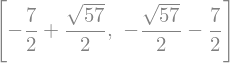

In [36]:
# b)
t = symbols('t')
B = A-t*eye(2)
solve(B.echelon_form()[1,1], t)

#### Assignment 7

Given the three matrices

$$
A=\left[\begin{array}{cc}
-1 & 2 \\
1 & 1
\end{array}\right], \quad B=\left[\begin{array}{ll}
1 & 2 \\
0 & 1
\end{array}\right], \quad C=\left[\begin{array}{ll}
2 & 2 \\
3 & 1
\end{array}\right]
$$

solve the following system of matrix equations (i.e. find matrices $X$ and $Y$ )

$$
\left\{\begin{array}{l}
A X+C Y=B A C \\
C X-B Y=C A B
\end{array}\right.
$$


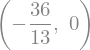

In [ ]:
# There are many ways to solve this problem. Here is one way to do it which is very "mathematical".

# Define the matrices A, B, and C
A = Matrix([[-1, 2], [1, 1]])
B = Matrix([[1, 2], [0, 1]])
C = Matrix([[2, 2], [3, 1]])

# Simply the RHS
Q = B*A*C
R = C*A*B

# Isolate X in each equation and solve for Y
Y = (A.inv()*Q - C.inv()*R)*(A.inv()*C + C.inv()*B).inv()

# Use Y to solve for X
X = A.inv()*(Q-C*Y)
X.det(), Y.det()

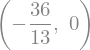

In [ ]:
# Here is another way to solve this problem which is more "programmatic"

# Define unknown matrices X and Y with symbolic entries
x11, x12, x21, x22 = symbols('x11 x12 x21 x22')
y11, y12, y21, y22 = symbols('y11 y12 y21 y22')

X =Matrix([[x11, x12],
               [x21, x22]])

Y = Matrix([[y11, y12],
               [y21, y22]])
# Compute BA and then BAC
BA = B * A
BAC = BA * C

# Compute AB and then CAB
AB = A * B
CAB = C * AB

# Equation 1: A*X + C*Y = BAC
eq1 = A * X + C * Y - BAC

# Equation 2: C*X - B*Y = CAB
eq2 = C * X - B * Y - CAB

# Flatten the equations into lists
equations = []
variables = [x11, x12, x21, x22, y11, y12, y21, y22]

# For Equation 1
for i in range(2):
    for j in range(2):
        equations.append(eq1[i, j])

# For Equation 2
for i in range(2):
    for j in range(2):
        equations.append(eq2[i, j])

# Solve the system of equations
solution = solve(equations, variables)

# Extract solutions
X_solution = X.subs(solution)
Y_solution = Y.subs(solution)

X_solution.det(), Y_solution.det()